## Loading the Data

using the CIFAR-10 dataset, a collection of 60,000 32 ×
32–pixel color images that comes bundled with Keras out of the box.

In [24]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

 x_train and x_test are numpy arrays of shape
[50000, 32, 32, 3] and [10000, 32, 32, 3], respectively. y_train and
y_test are numpy arrays with shape [50000, 1] and [10000, 1], respectively,
containing the integer labels in the range 0 to 9 for the class of each image.

In [25]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [26]:
NUM_CLASSES = 10

<div style="margin-bottom: 20px;">  
By default the image data consists of integers between 0 and 255 for each pixel
channel. Neural networks work best when each input is inside the range –1 to 1,
so we need to divide by 255.  
</div>  

<div style="margin-bottom: 20px;">  
  one-hot-encoded
vectors. If the class integer label of an image is i, then its one-hot encoding is a
vector of length 10 (the number of classes) that has 0s in all but the ith element,
which is 1. The new shapes of y_train and y_test are therefore [50000, 10]
and [10000, 10] respectively
</div> 



In [27]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
x_train.shape
y_train.shape
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


## Compare between Sequential and Functional API

Example 1 The architecture using Sequential Model

In [28]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(200, activation='relu', input_shape=(32,32,3)),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

/home/icl/anaconda3/envs/lightning_liang/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 32, 32, 200)    │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 204800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 150)            │    30,720,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,722,460 (117.20 MB)

 Trainable params: 30,722,460 (117.20 MB)

 Non-trainable params: 0 (0.00 B)

Example 2 The architecture using the Functional API

In [29]:
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model

input_layer = Input(shape=(32,32,3))

x = Flatten()(input_layer)

x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)

output_layer = Dense(units=10, activation='softmax')(x)

model = Model(input_layer, output_layer)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

In this step, we compile the model with an optimizer and a loss function:

In [30]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

Training the Model

In [31]:
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2809 - loss: 1.9756
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3913 - loss: 1.6921
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4341 - loss: 1.5898
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4474 - loss: 1.5459
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4653 - loss: 1.4994
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4749 - loss: 1.4750
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4878 - loss: 1.4395
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4925 - loss: 1.4238
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5069 - loss: 1.3912
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5097 - loss: 1.3750


## Evaluating the Model
how does
it perform on data it has never seen?---test data!

In [32]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4972 - loss: 1.4169


[1.422444224357605, 0.4916999936103821]

We can view some of the predictions on the test set using the predict method:

In [33]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                    'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


View some of te images and predictions

In [34]:
import matplotlib.pyplot as plt

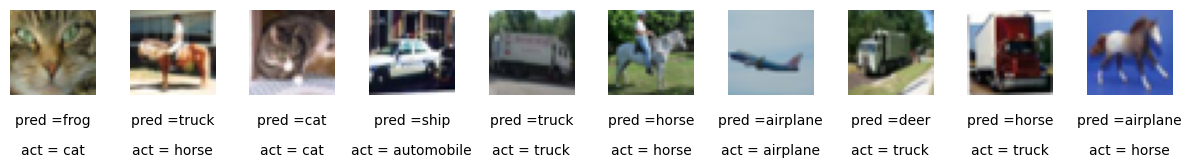

In [35]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred =' + str(preds_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' +str(actual_single[idx]), fontsize=10,
            ha = 'center', transform=ax.transAxes)
    ax.imshow(img)

## Improving the Model

 In fact, our first step is to flatten the image into a single vector, so that
we can pass it to the first Dense layer!

### Convolutional Layers

 applying Conv2D layers to
the CIFAR-10 dataset.

In [36]:
# from tensorflow.keras.layers import Conv2D
# input_layer = Input(shape=(32,32,3))

# conv_layer_1 = Conv2D(
#     filters = 10,
#     kernel_size = (4,4),
#     strides = 2,
#     padding = 'same'
#     )(input_layer)

# conv_layer_2 = Conv2D(
#     filters = 20,
#     kernel_size = (3,3),
#     strides = 2,
#     padding = 'same'
#     )(conv_layer_1)

# flatter_layer = Flatten()(conv_layer_2)
# output_layer = Dense(units=10, activation='softmax')(flatter_layer)
# model = Model(input_layer, output_layer)

# model.summary()

### Batch Normalization*

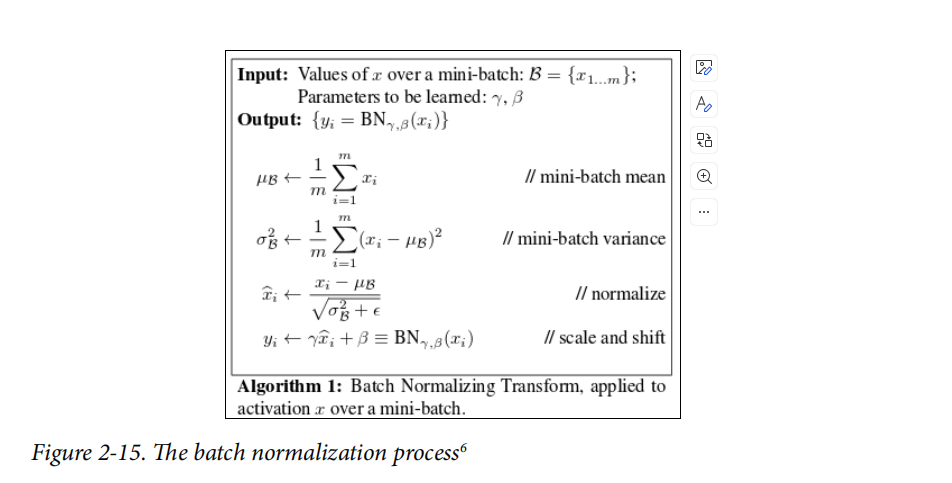

Batch normalization is used to address the problem of exponential growth.

### Dropout layers*

Dropout layers are used to address the problem of overfitting

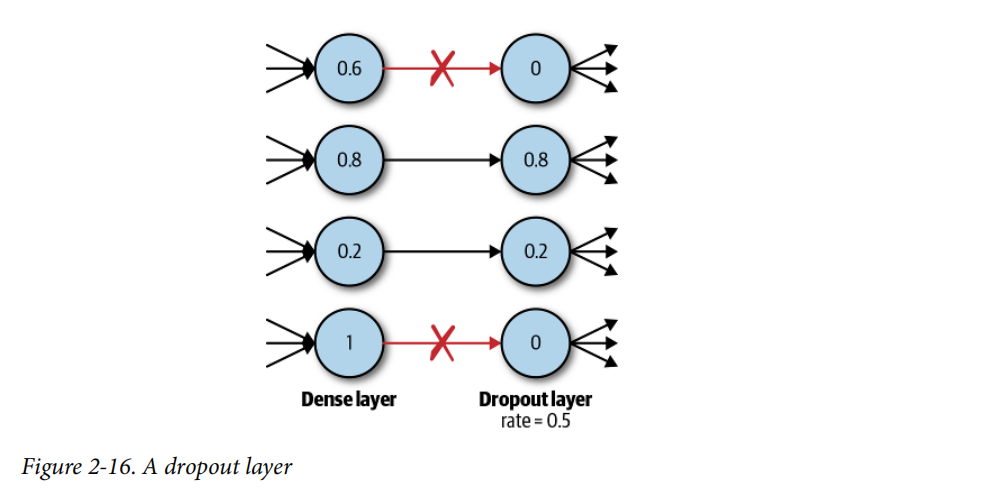

## Putting Conv2d, BatchNormalization  and Dropout together

In [38]:
from tensorflow.keras.layers import BatchNormalization, Dropout, LeakyReLU, Activation, Conv2D
input_layer = Input((32,32,3))

x = Conv2D(filters=32, kernel_size=3,
           strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3,
           strides=2, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3,
           strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3,
           strides=2, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

model.summary()




Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,101,130 (8.02 MB)

 Trainable params: 2,100,746 (8.01 MB)

 Non-trainable params: 384 (1.50 KB)

In [41]:

model.evaluate(x_test, y_test, batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0865 - loss: 2.3154


[2.314181327819824, 0.08659999817609787]